<h1 style="font-weight: bold; color: gold;">Breast Cancer Classification Using Artificial Neural Network (ANN)</h1> <h2> Goal: Classify breast cancer tumors as benign (0) or malignant (1) using a neural network built with TensorFlow/Keras. </h2>

<h2> 1. Importing the Required Libraries </h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<h2> 2. Loading and Preparing the Dataset </h2>

In [6]:
# Load the breast cancer dataset from scikit-learn
breast_cancer = load_breast_cancer()

# Convert it into a DataFrame
data_frame = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data_frame['label'] = breast_cancer.target  # Add the target labels (0 = benign, 1 = malignant)


# Remove duplicates and missing values if any
data_frame.dropna(inplace=True)
data_frame.drop_duplicates(inplace=True)

# Split features (X) and labels (Y)
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

# Shape of DataFrame
data_frame.shape

(569, 31)

<h2> 3. Data Normalization and Splitting </h2>

In [4]:
# Standardize the feature data (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=1)

print("Training set shape:", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape: (455, 30)
Testing set shape:  (114, 30)


<h2> 4. Building the Neural Network Model </h2>

In [7]:
# Define a simple feedforward neural network
model = Sequential([
    Dense(10, activation='relu', input_shape=(30,)),   # 1 hidden layer with 10 neurons
    Dense(2, activation='softmax')                      # Output layer for 2 classes
])

# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\majec\OneDrive\Projekty python\ANN\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h2> 5. Training the Model </h2>

In [8]:
# Train the model for 10 epochs using training data
mod = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5750 - loss: 0.7065 - val_accuracy: 0.6140 - val_loss: 0.6505
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6629 - loss: 0.6121 - val_accuracy: 0.7193 - val_loss: 0.4982
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7630 - loss: 0.4600 - val_accuracy: 0.7982 - val_loss: 0.3920
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8345 - loss: 0.3712 - val_accuracy: 0.8860 - val_loss: 0.3100
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9114 - loss: 0.3092 - val_accuracy: 0.9386 - val_loss: 0.2509
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9433 - loss: 0.2539 - val_accuracy: 0.9474 - val_loss: 0.2074
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9297 - loss: 0.2221 - val_accuracy: 0.9561 - val_loss: 0.1793
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9475 - loss: 0.1935 - val_accuracy: 0.9649 - val_loss

<h2> 6. Evaluating Model Performance </h2>

In [9]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test Accuracy:', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9832 - loss: 0.1324 
Test Accuracy: 0.9736841917037964


<h2> 7. Predictions and Confusion Matrix </h2>

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Confusion Matrix:
[[40  2]
 [ 1 71]]


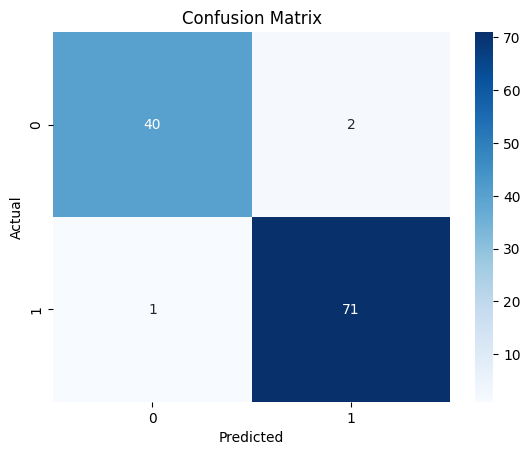

In [10]:
# Generate predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h2> 8. Visualizing Accuracy During Training </h2>

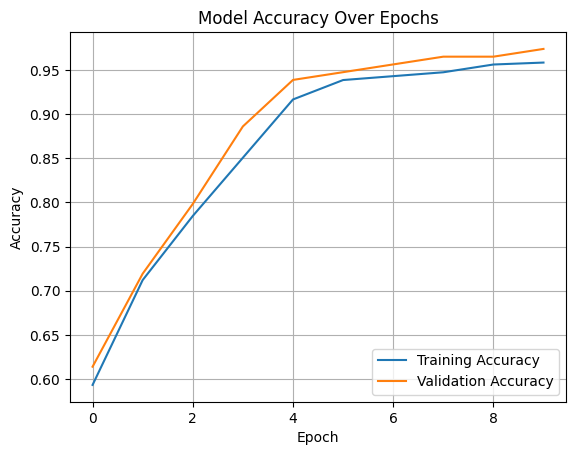

In [11]:
# Plot training and validation accuracy over epochs
plt.plot(mod.history['accuracy'], label='Training Accuracy')
plt.plot(mod.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<h2> 9. Calculating Metrics: Accuracy, Precision, Recall, Specificit </h2>

In [13]:
# Unpack confusion matrix values
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate performance metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
specificity = TN / (TN + FP)

# Print the results
print(f"➡️ Accuracy:           {accuracy:.4f}")
print(f"➡️ Precision:          {precision:.4f}")
print(f"➡️ Recall (Sensitivity): {recall:.4f}")
print(f"➡️ Specificity:        {specificity:.4f}")


➡️ Accuracy:           0.9737
➡️ Precision:          0.9726
➡️ Recall (Sensitivity): 0.9861
➡️ Specificity:        0.9524
